In [88]:
import numpy as np

In [89]:
A = np.random.randint(0, 7, (5, 5))

In [90]:
A

array([[3, 5, 5, 2, 2],
       [0, 2, 3, 5, 5],
       [1, 2, 6, 3, 0],
       [5, 1, 0, 5, 1],
       [2, 0, 2, 6, 3]])

In [125]:
def padding(A, p=1, mode='zero'):
    if mode == 'zero':
        B = np.zeros((A.shape[0] + 2*p, A.shape[1] + 2*p))
        B[p:B.shape[0]-p, p:B.shape[1]-p] = A

    elif mode == 'mirror':
        padded_A = np.pad(A, (p, p), mode='edge')
        B = padded_A.copy()

    elif mode == 'circular':
        B = np.zeros((A.shape[0] + 2*p, A.shape[1] + 2*p))
        B[:p, :p] = A[-p:, -p:]
        B[:p, p:B.shape[1]-p] = A[-p:, :]
        B[:p, B.shape[1]-p:] = A[-p:, :p]
        B[p:B.shape[0]-p, :p] = A[:, -p:]
        B[p:B.shape[0]-p, p:B.shape[1]-p] = A
        B[p:B.shape[0]-p, B.shape[1]-p:] = A[:, :p]
        B[B.shape[0]-p:, :p] = A[:p, -p:]
        B[B.shape[0]-p:, p:B.shape[1]-p] = A[:p, :]
        B[B.shape[0]-p:, B.shape[1]-p:] = A[:p, :p]

    else:
        raise ValueError("Invalid padding mode. Must be 'zero', 'mirror' or 'circular'.")
    
    return B

In [92]:
padding(A, 3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 5., 5., 2., 2., 0., 0., 0.],
       [0., 0., 0., 0., 2., 3., 5., 5., 0., 0., 0.],
       [0., 0., 0., 1., 2., 6., 3., 0., 0., 0., 0.],
       [0., 0., 0., 5., 1., 0., 5., 1., 0., 0., 0.],
       [0., 0., 0., 2., 0., 2., 6., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Averaging

In [93]:
def Average(A, k=3):
    B = np.zeros((A.shape[0] - (k//2 * 2),A.shape[1] - (k//2 * 2)))
    for i in range(0, A.shape[0]):
        for j in range(0, A.shape[1]):
            temp = A[i:i+k, j:j+k]
            if np.prod(temp.shape) == k**2:
                B[i,j] = temp.mean()
    return B

In [94]:
Average(padding(A))

array([[1.11111111, 2.        , 2.44444444, 2.44444444, 1.55555556],
       [1.44444444, 3.        , 3.66666667, 3.44444444, 1.88888889],
       [1.22222222, 2.22222222, 3.        , 3.11111111, 2.11111111],
       [1.22222222, 2.11111111, 2.77777778, 2.88888889, 2.        ],
       [0.88888889, 1.11111111, 1.55555556, 1.88888889, 1.66666667]])

In [95]:
A

array([[3, 5, 5, 2, 2],
       [0, 2, 3, 5, 5],
       [1, 2, 6, 3, 0],
       [5, 1, 0, 5, 1],
       [2, 0, 2, 6, 3]])

Median Filter,Max Filter,Min Filter

In [96]:
def Median(A, k=3):
    B = np.zeros((A.shape[0] - (k//2 * 2),A.shape[1] - (k//2 * 2)))
    for i in range(0, A.shape[0]):
        for j in range(0, A.shape[1]):
            temp = A[i:i+k, j:j+k]
            if np.prod(temp.shape) == k**2:
                B[i,j] = np.median(temp)
    return B

In [97]:
def Max(A, k=3):
    B =np.zeros((A.shape[0] - (k//2 * 2),A.shape[1] - (k//2 * 2)))
    for i in range(0, A.shape[0]):
        for j in range(0, A.shape[1]):
            temp = A[i:i+k, j:j+k]
            if np.prod(temp.shape) == k**2:
                B[i,j] = np.max(temp)
    return B

In [98]:
def Min(A, k=3):
    B =np.zeros((A.shape[0] - (k//2 * 2),A.shape[1] - (k//2 * 2)))
    for i in range(0, A.shape[0]):
        for j in range(0, A.shape[1]):
            temp = A[i:i+k, j:j+k]
            if np.prod(temp.shape) == k**2:
                B[i,j] = np.min(temp)
    return B

Laplacian Filter (45,90)

In [99]:
def Laplacian(A, deg=45):
  k = 3
  if deg == 45:
    coef = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
  if deg == 90:
    coef = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
  B = np.zeros((A.shape[0] - (k // 2 * 2), A.shape[1] - (k // 2 * 2)))
  for i in range(0, A.shape[0]):
    for j in range(0, A.shape[1]):
      temp = A[i:i+k, j:j+k]
      if np.prod(temp.shape) == k ** 2:
        B[i, j] = np.sum(temp * coef)
  return B

In [100]:
Laplacian(A)

array([[  2.,   6.,  -7.],
       [  2., -16.,   4.],
       [  3.,  14., -10.]])

In [101]:
import cv2
import matplotlib.pyplot as plt


In [102]:
Circuit = cv2.imread('circuit.tif', cv2.IMREAD_GRAYSCALE) / 255.
Circuit.dtype


dtype('float64')

In [103]:
Moon = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE) / 255.
Moon.dtype

dtype('float64')

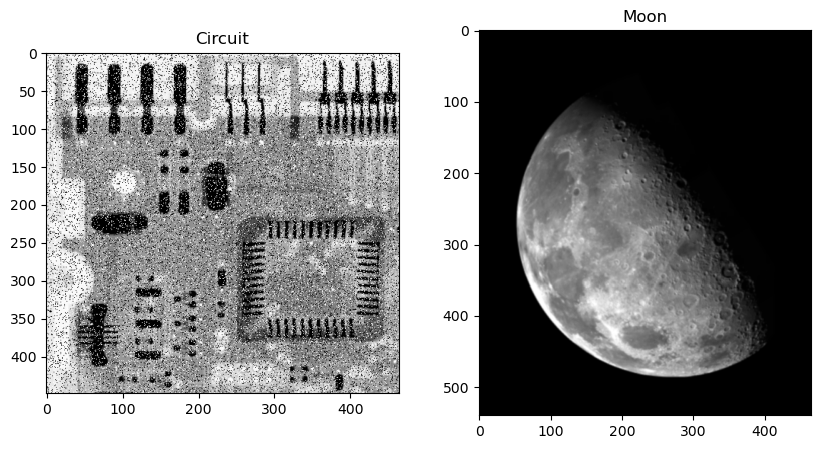

In [104]:
plt.figure(figsize=(10, 5))

# Display Circuit image
plt.subplot(1, 2, 1)
plt.imshow(Circuit, cmap='gray')
plt.title('Circuit')

# Display Moon image
plt.subplot(1, 2, 2)
plt.imshow(Moon, cmap='gray')
plt.title('Moon')

plt.show()


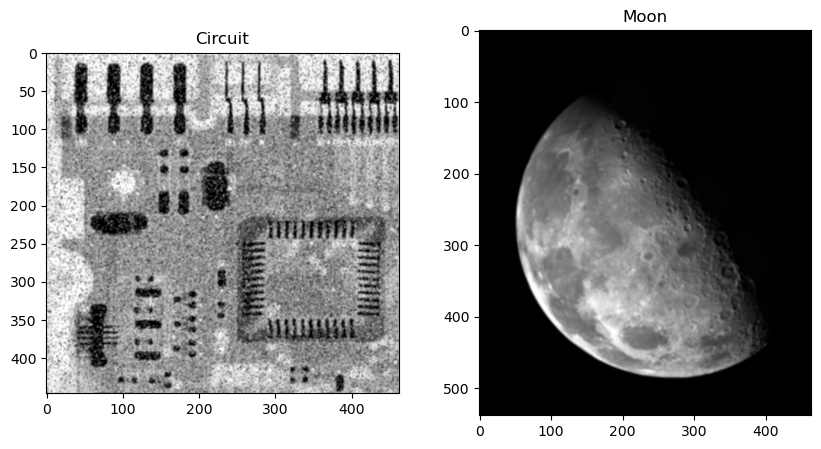

In [105]:
plt.figure(figsize=(10, 5))

# Display Circuit image
plt.subplot(1, 2, 1)
plt.imshow(Average(Circuit), cmap='gray')
plt.title('Circuit')

# Display Moon image
plt.subplot(1, 2, 2)
plt.imshow(Average(Moon), cmap='gray')
plt.title('Moon')

plt.show()

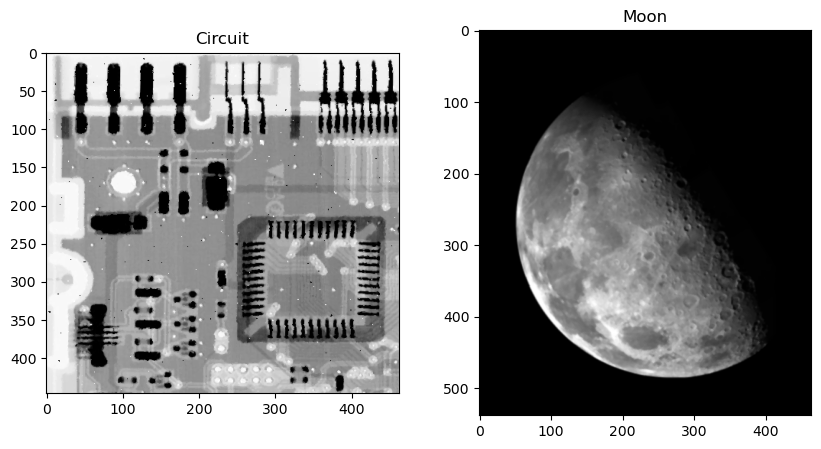

In [106]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Median(Circuit), cmap='gray')
plt.title('Circuit')

plt.subplot(1, 2, 2)
plt.imshow(Median(Moon), cmap='gray')
plt.title('Moon')

plt.show()

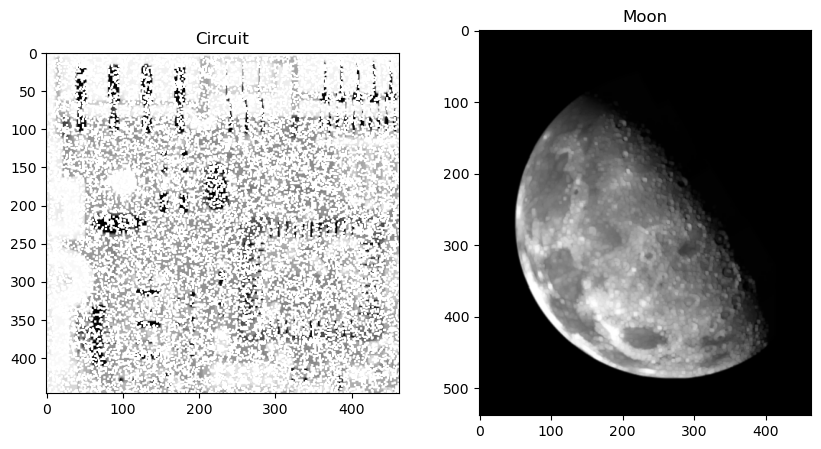

In [107]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Max(Circuit), cmap='gray')
plt.title('Circuit')

plt.subplot(1, 2, 2)
plt.imshow(Max(Moon), cmap='gray')
plt.title('Moon')

plt.show()

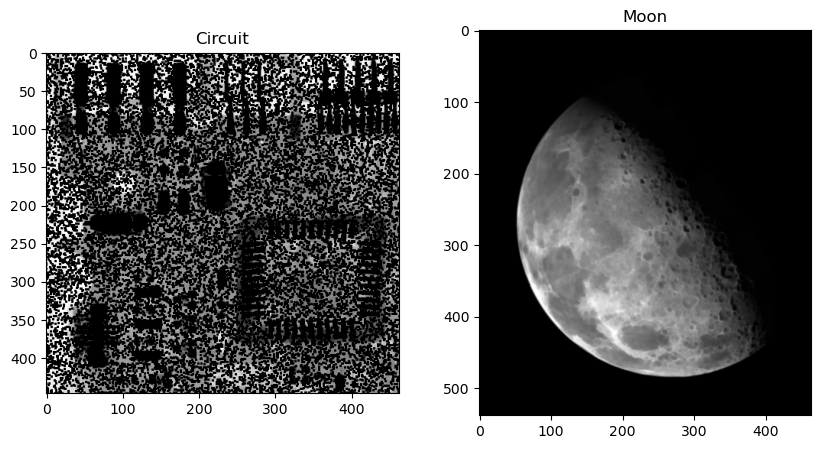

In [108]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Min(Circuit), cmap='gray')
plt.title('Circuit')

plt.subplot(1, 2, 2)
plt.imshow(Min(Moon), cmap='gray')
plt.title('Moon')

plt.show()

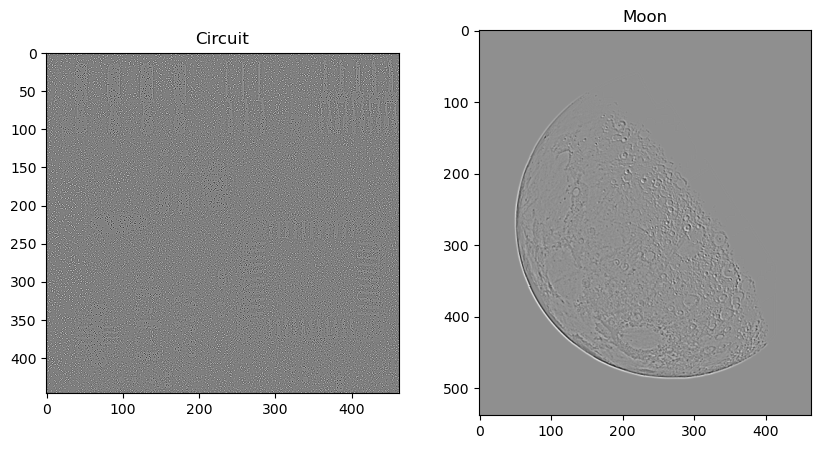

In [109]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Laplacian(Circuit), cmap='gray')
plt.title('Circuit')

plt.subplot(1, 2, 2)
plt.imshow(Laplacian(Moon), cmap='gray')
plt.title('Moon')

plt.show()


In [110]:
LaplacianMoon = Laplacian(padding(Moon, 1, 'zero'))

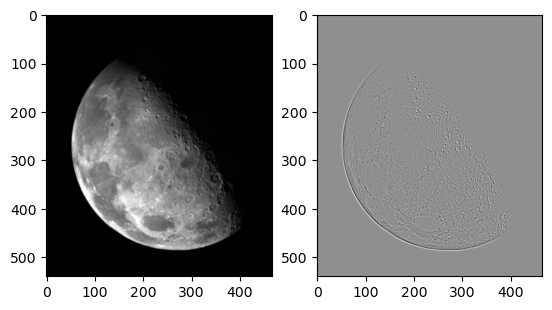

In [111]:
plt.subplot(1,2,1)
plt.imshow(Moon, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(LaplacianMoon, cmap='gray')
plt.show()


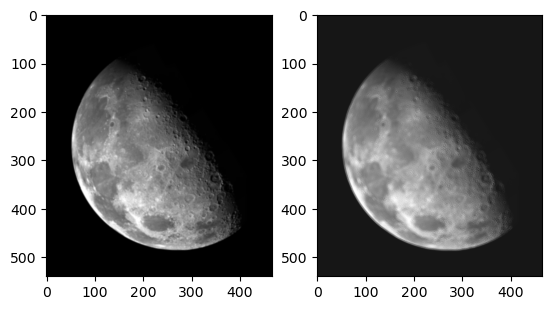

In [112]:
plt.subplot(1,2,1)
plt.imshow(Moon, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Moon + LaplacianMoon, cmap='gray')
plt.show()

CompositeLaplacian

In [113]:
def CompositeLaplacian(A, deg=45):
  k = 3
  if deg == 45:
    coef = -1 * np.array([[0, 1, 0], [1, -5, 1], [0, 1, 0]])
  if deg == 90:
    coef = -1 * np.array([[1, 1, 1], [1, -9, 1], [1, 1, 1]])
  B = np.zeros((A.shape[0] - (k // 2 * 2), A.shape[1] - (k // 2 * 2)))
  for i in range(0, A.shape[0]):
    for j in range(0, A.shape[1]):
      temp = A[i:i+k, j:j+k]
      if np.prod(temp.shape) == k ** 2:
        B[i, j] = np.sum(temp * coef)
  return B

In [114]:
CompositeLaplacianMoon = CompositeLaplacian(padding(Moon, 1, 'zero'))

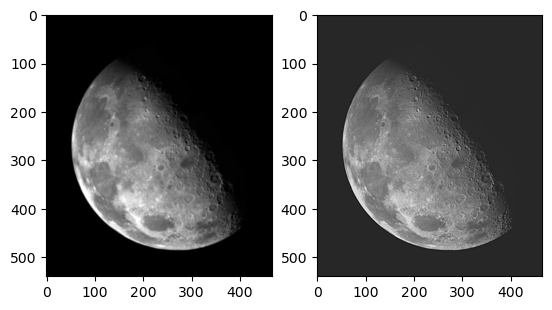

In [115]:
plt.subplot(1,2,1)
plt.imshow(Moon, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(CompositeLaplacianMoon, cmap='gray')
plt.show()

Unsharp

In [126]:
AverageMoon = Average(padding(Moon, p=30), k=61)  # Ensure AverageMoon is correctly computed

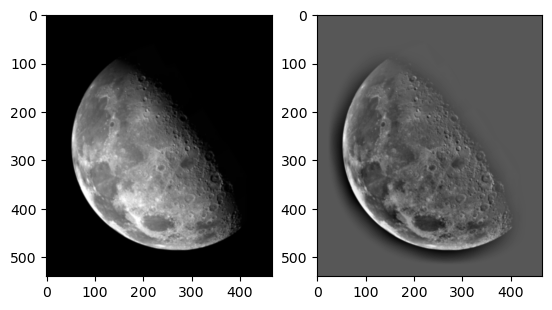

In [127]:
plt.subplot(1,2,1)
plt.imshow(Moon, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Moon - AverageMoon, cmap='gray')
plt.show()

In [128]:
unsharpMoon = Moon - AverageMoon

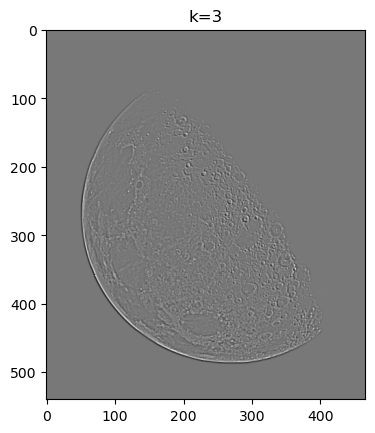

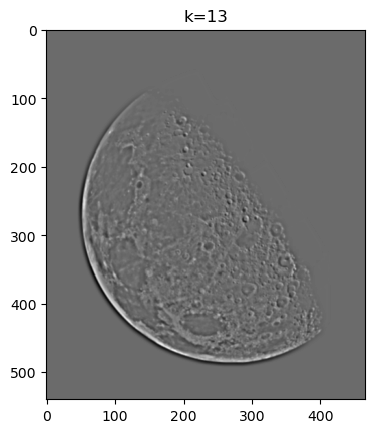

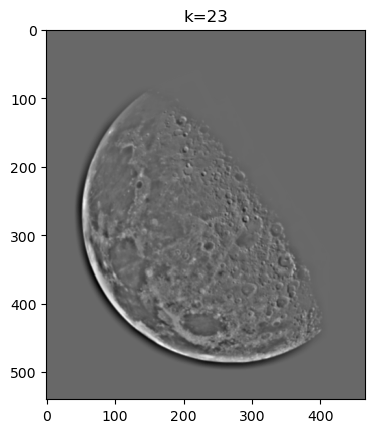

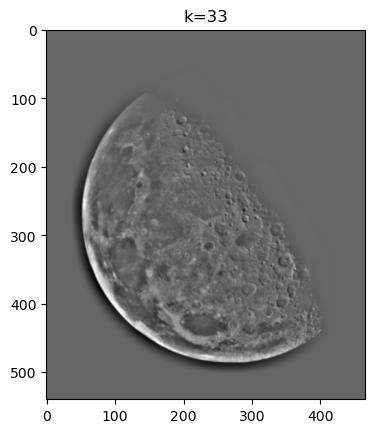

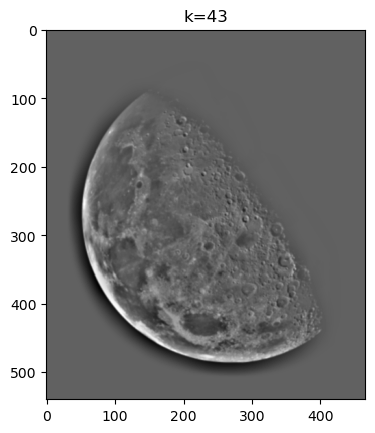

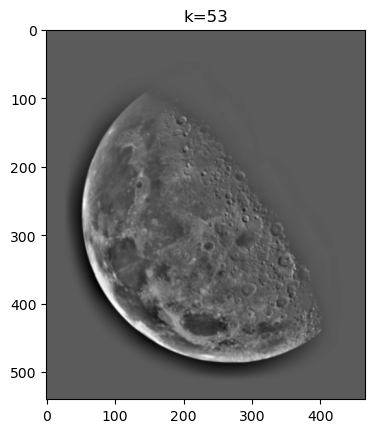

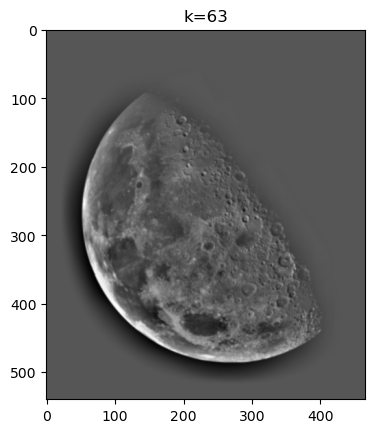

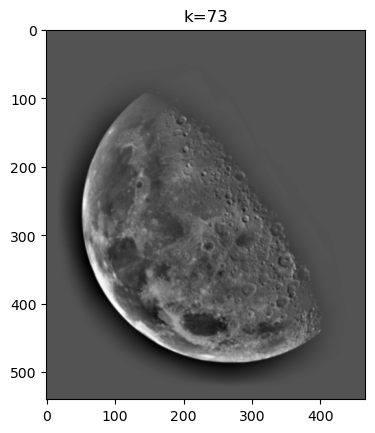

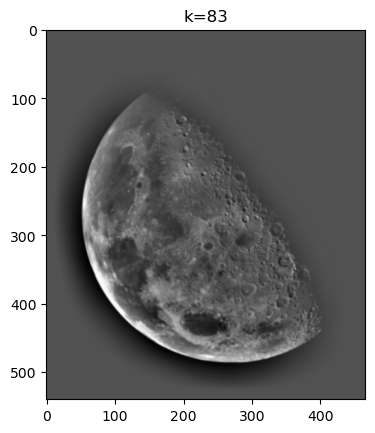

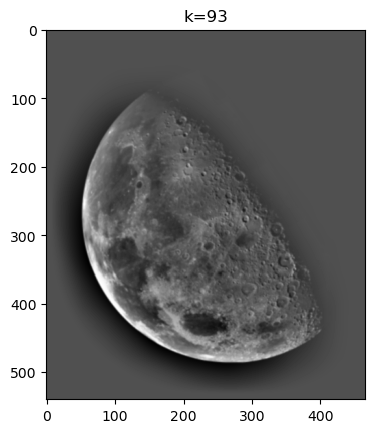

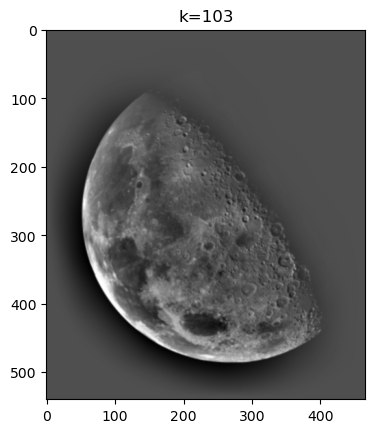

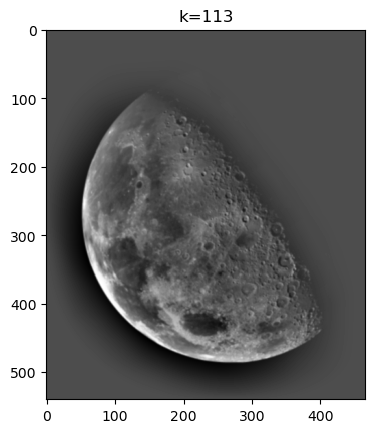

In [130]:
for k in range(3, 120, 10):
  plt.imshow(Moon - Average(padding(Moon, p=k // 2), k=k), cmap='gray')
  plt.title(f'k={k}')
  plt.show()